In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [6]:
model = tf.keras.models.Sequential([
           tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(128, activation='relu'),
           tf.keras.layers.Dense(10, activation='softmax')
        ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [7]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


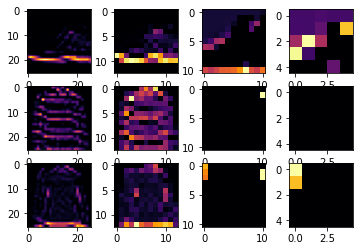

In [8]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

For a notebook to experiment with pools and filters visit
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb

In [ ]:
# GRADED FUNCTION: train_mnist_conv
def train_mnist_conv():
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            # In some versions, accuracy may come with key 'acc'
            if(logs.get('acc') > 0.998):
                print('\nReached 99.8% accuracy so cancelling training!')
                self.model.stop_training = True
    # YOUR CODE ENDS HERE

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
    # YOUR CODE STARTS HERE
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0
    callbacks = myCallback()
    # YOUR CODE ENDS HERE
    model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
              tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(2, 2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')
            # YOUR CODE ENDS HERE
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE
        training_images, training_labels, epochs=20, callbacks=[callbacks]
        # YOUR CODE ENDS HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]